Assignment 2

Names: Shipali S, Vedanth S Saoor

roll no.: 213010008,213010012

In [98]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

In [99]:
#Reading the data 
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


##Exploratory Data Analysis

In [100]:
#Checking for Nan values

#info method gives information about the number of rows in the data and the number of non-null values each column
#df.info()
print("Number of Null/Nan values in the given dataset => ",df.isnull().sum().sum())

Number of Null/Nan values in the given dataset =>  979


Number of Null/Nan values remaining in the given dataset => 0
Genotype: 
Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

Treatment_Behavior: 
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


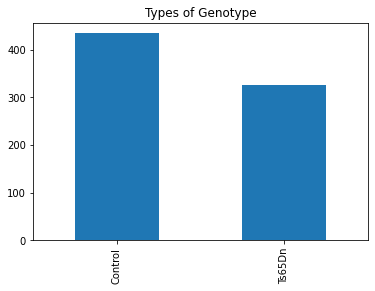

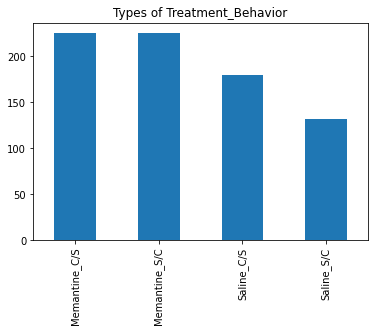

In [101]:
#Removing the Nan values

#We are removing the target variables prior to imputation of the missing values
imp_dataset = df.drop(columns = ['Genotype','Treatment_Behavior'],axis = 1)

imp = IterativeImputer(max_iter = 10, tol = 1e-3)

#Following we fit the imputer on the dataset (i.e imp_dataset) and it returns self
imp.fit(imp_dataset)

#Using the fit_transform we fit the imputer on the dataset (i.e imp_dataset) and it returns the transformed dataset
#The dataset is then converted into a dataframe
df_imputed = pd.DataFrame(imp.fit_transform(imp_dataset),columns = imp_dataset.columns)

df_imputed['Genotype'] = df['Genotype']  
df_imputed['Treatment_Behavior'] = df['Treatment_Behavior'] 

#df_imputed.head()
print("Number of Null/Nan values remaining in the given dataset =>",df_imputed.isnull().sum().sum())
print("Genotype: ")
print(df_imputed['Genotype'].value_counts())
print()
print("Treatment_Behavior: ")
print(df_imputed['Treatment_Behavior'].value_counts())

#Checking for class imbalance 
df_imputed['Genotype'].value_counts().plot(kind='bar')
plt.title('Types of Genotype')
plt.show()

df_imputed['Treatment_Behavior'].value_counts().plot(kind='bar')
plt.title('Types of Treatment_Behavior')
plt.show()


#Label Encoding columns 'Genotype' and 'Treatment_Behavior'
#le1 is used for Binary classification label encoding
#le2 is used for Multi-class classification label encoding
le1 = LabelEncoder()
le2 = LabelEncoder()
df_imputed['Genotype'] = le1.fit_transform(df_imputed['Genotype'])
df_imputed['Treatment_Behavior'] = le2.fit_transform(df_imputed['Treatment_Behavior'])

#Splitting the data into train and test as correlation analysis is done only on the training dataset

X = df_imputed.drop(columns=['Genotype','Treatment_Behavior'],axis=1)

Y_binary = df_imputed['Genotype']
Y_multi = df_imputed['Treatment_Behavior']

#Splitting the data into train and validation dataset
X_train_binary, X_valid_binary, Y_train_binary, Y_valid_binary = train_test_split(X,Y_binary,test_size=0.3)
X_train_multi, X_valid_multi, Y_train_multi, Y_valid_multi = train_test_split(X,Y_multi,test_size=0.3)

#df_imputed

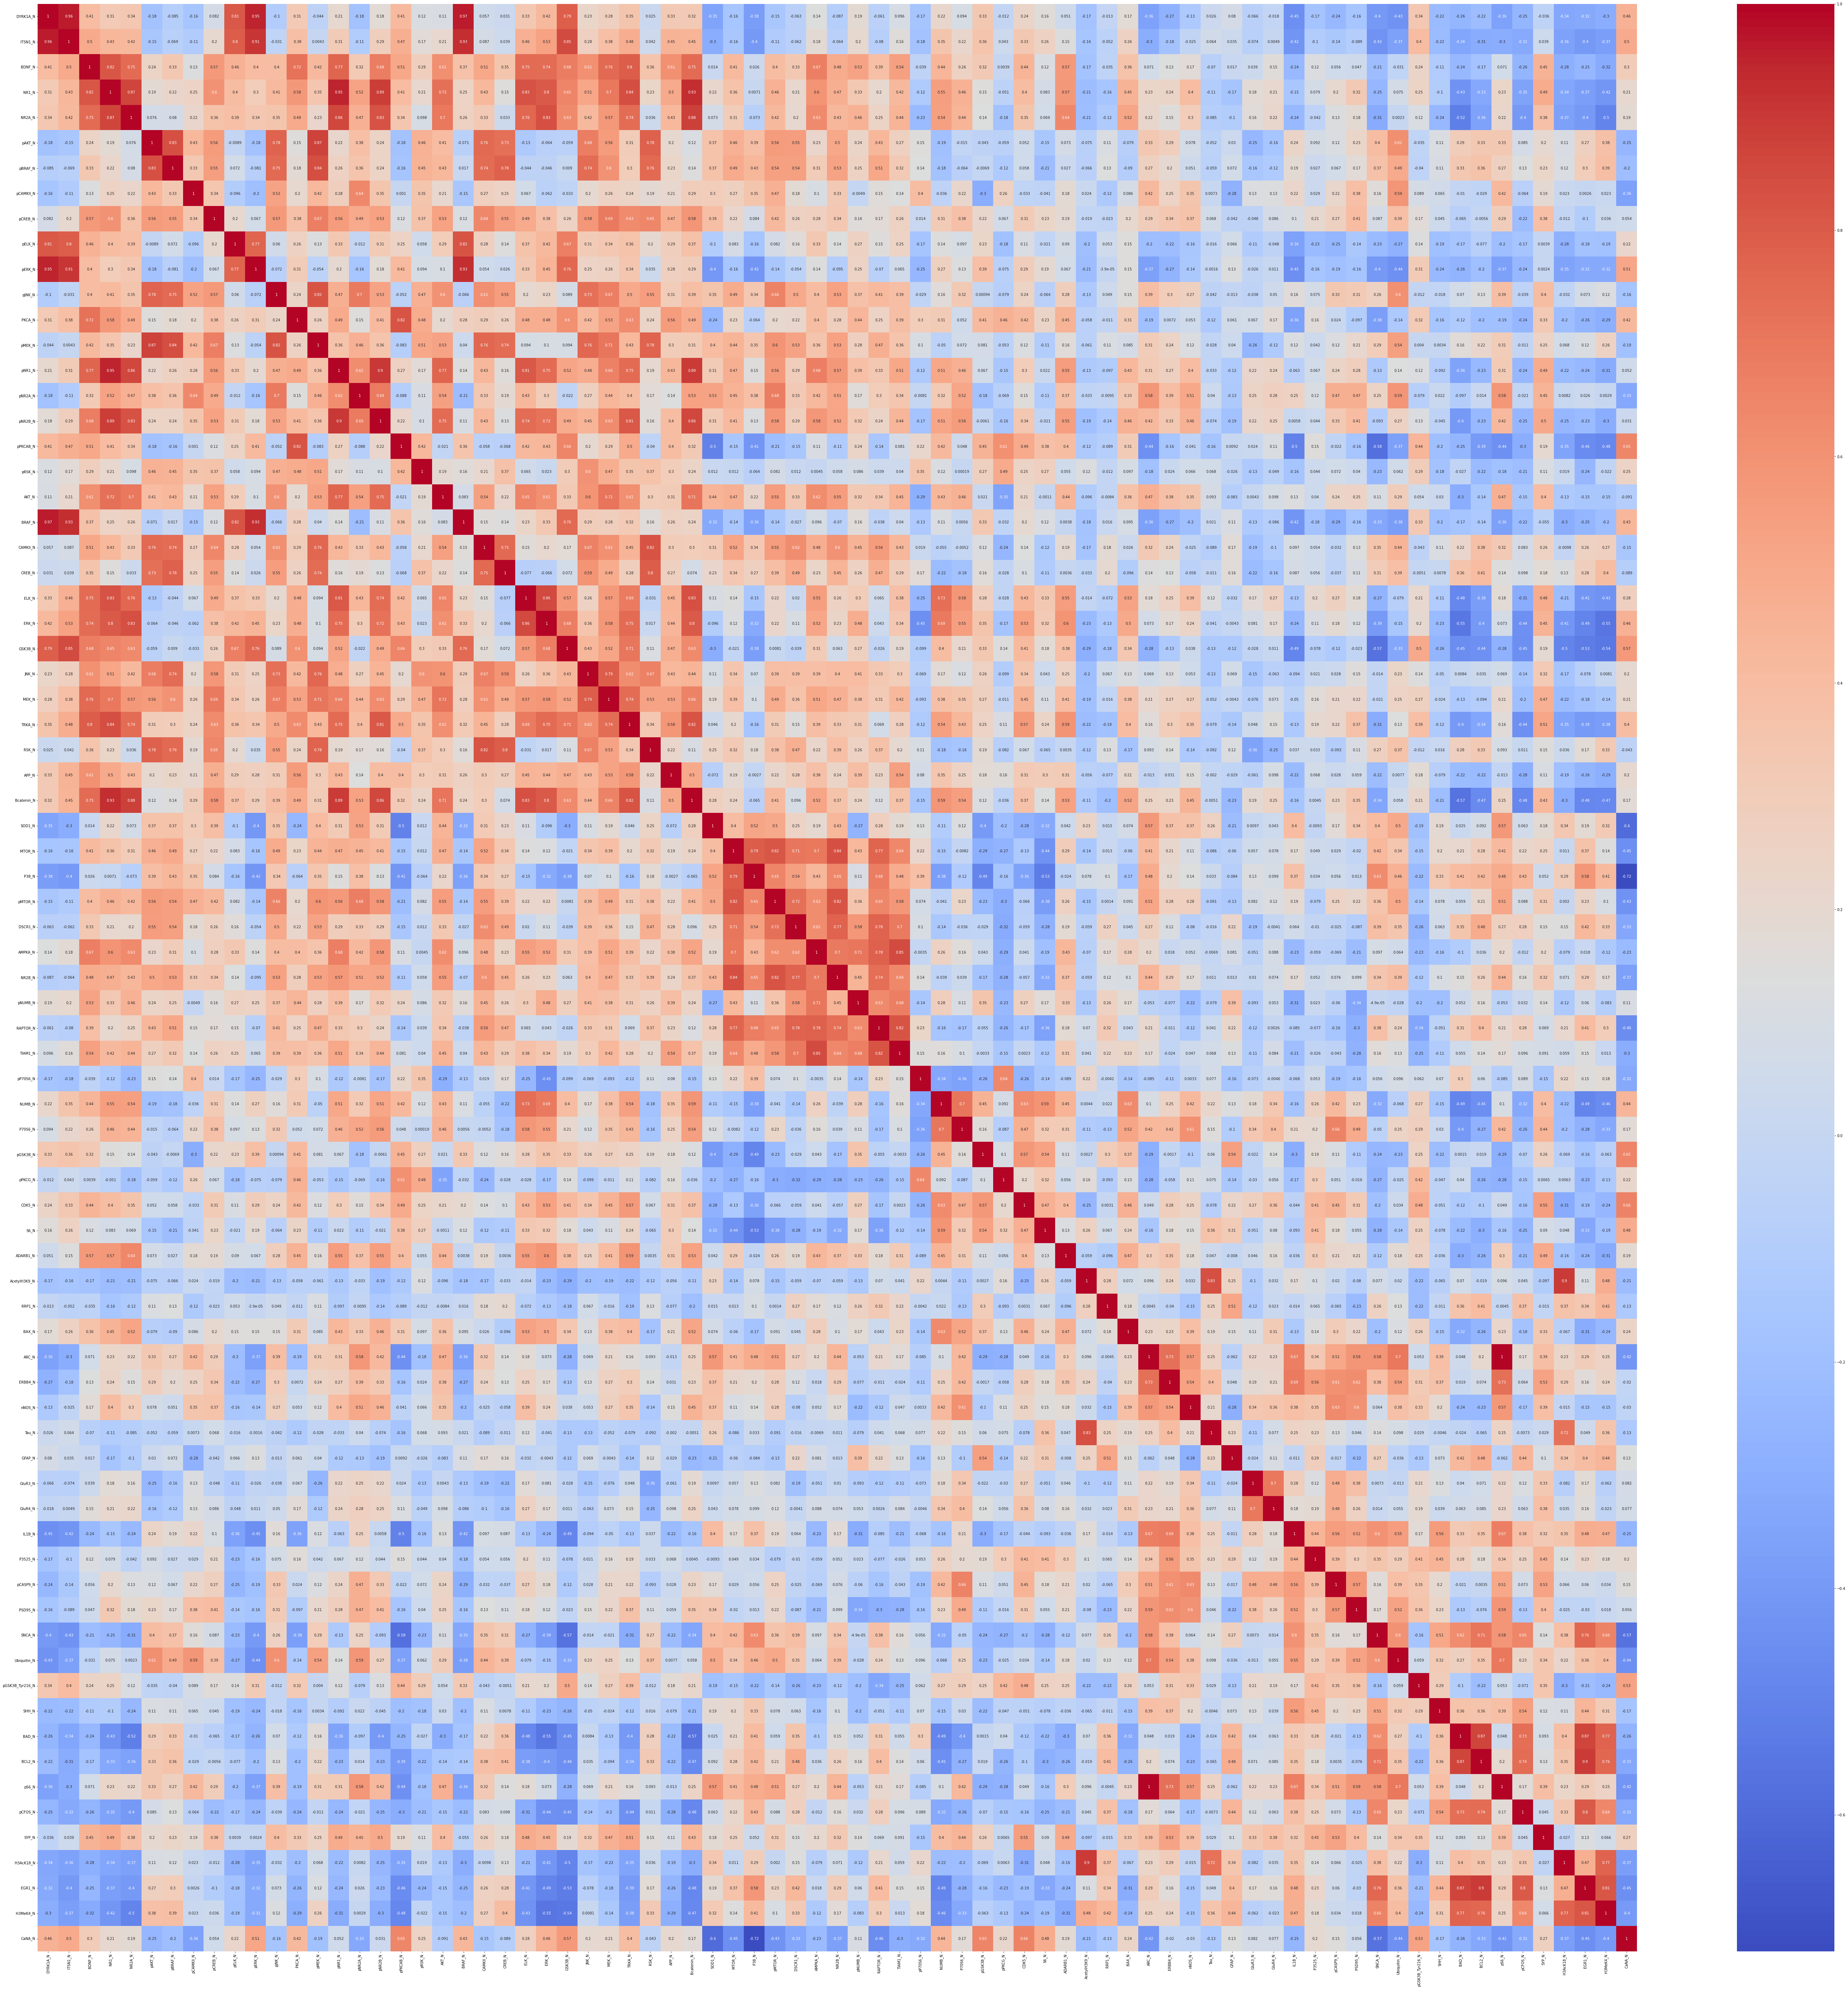

In [102]:
#Performing the correlation analysis 
correlation = X.corr()

#Displaying the correlation heatmap
plt.figure(figsize = (100,100))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

In [103]:
#Correlation values
X.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.255974,-0.216103,-0.358480,-0.251624,-0.035929,-0.335634,-0.318127,-0.303629,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.341409,-0.307867,-0.299066,-0.323878,0.039384,-0.357801,-0.404352,-0.374469,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.241762,-0.170503,0.070504,-0.261622,0.454025,-0.284638,-0.245891,-0.316513,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.431328,-0.329547,0.227674,-0.354048,0.486483,-0.339320,-0.371601,-0.416312,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.515386,-0.360714,0.215495,-0.398397,0.377628,-0.365133,-0.404731,-0.495630,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.092961,0.126999,0.392329,0.045355,1.000000,-0.026638,0.126842,0.066385,0.273142
H3AcK18_N,-0.335634,-0.357801,-0.284638,-0.339320,-0.365133,0.111374,0.117245,0.022751,-0.011882,-0.280310,...,0.106568,0.395043,0.348716,0.227340,0.334516,-0.026638,1.000000,0.472318,0.773785,-0.374384
EGR1_N,-0.318127,-0.404352,-0.245891,-0.371601,-0.404731,0.270293,0.299277,0.002624,-0.101555,-0.179463,...,0.435639,0.869949,0.898038,0.290373,0.798620,0.126842,0.472318,1.000000,0.811860,-0.447239
H3MeK4_N,-0.303629,-0.374469,-0.316513,-0.416312,-0.495630,0.377283,0.390171,0.023349,0.036304,-0.186654,...,0.311758,0.773979,0.763827,0.250313,0.643002,0.066385,0.773785,0.811860,1.000000,-0.396349


In [104]:
#Selecting the features that has to be removed
cols = []
#Threshold of 0.8 is used any feature whose correlation with another feature is greater than 0.8 will be removed later
threshold = 0.8
for i in range(len(correlation.columns)):
    for j in range(i):
        if(abs(correlation.iloc[i,j]) >threshold):
            cols.append(correlation.columns[i])

#Set is used has duplicate elements cannot be in a set there by cancelling features appearing multiple times in the set
cols = list(set(cols))
print("Number of Correlated features: ",len(cols))

Number of Correlated features:  26


In [105]:
#Displaying the number of features before removing that particular feature
print(X_train_binary.shape)
print(X_valid_binary.shape)

(533, 77)
(229, 77)


In [106]:
#Droppging entire column associated with that particulare feature whose correlation is greater than 0.8
#We drop the features from both train and validation data set
X_train_binary =  X_train_binary.drop(cols,axis = 1)
X_valid_binary = X_valid_binary.drop(cols,axis = 1)

X_train_multi =  X_train_multi.drop(cols,axis = 1)
X_valid_multi = X_valid_multi.drop(cols,axis = 1)

In [107]:
#Verifying if columns are dropped
print(X_train_binary.shape)
print(X_valid_binary.shape)

(533, 51)
(229, 51)


##Binary Classification

###Elastic Net Logistic Regression

Best Parameters:  {'alpha': 0.001, 'l1_ratio': 0.75}
Grid Search best score:  0.829
Metrics for Validation set 

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       129
           1       0.90      0.88      0.89       100

    accuracy                           0.90       229
   macro avg       0.90      0.90      0.90       229
weighted avg       0.90      0.90      0.90       229

Balanced Accuracy:  0.901
AUC:  0.901


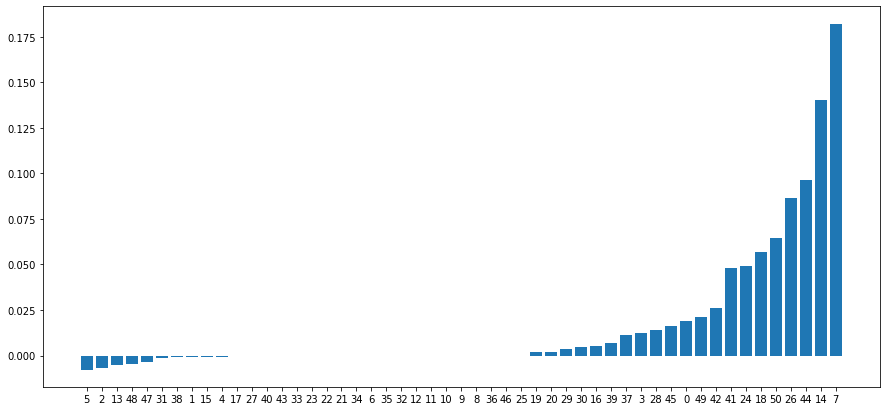


Top 10 features with the most importance are: 
pNR2A_N, APP_N, Ubiquitin_N, pPKCG_N, CaNA_N, DSCR1_N, P70S6_N, pCASP9_N, PSD95_N, SYP_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       129
           1       0.94      0.79      0.86       100

    accuracy                           0.89       229
   macro avg       0.90      0.88      0.88       229
weighted avg       0.89      0.89      0.88       229

Balanced Accuracy:  0.876
AUC:  0.876


In [108]:
#We are using SDGClassifier has it implements logistic regression with elastic net penalty

#Estimator for GridSearchCV
SG_b = SGDClassifier(penalty = 'elasticnet')

#Tuning parameter alpha and l1_ratio
#Creating a dictionary of parameters to try in GridSearchCV
params_={
        'alpha' : [1e-3,1e-2,1e-1,1],
        'l1_ratio' : [0.1,0.25,0.5,0.75]
}
#Using Gridsearch cv to find the best parameters
clf = GridSearchCV(estimator = SG_b, param_grid = params_,scoring='f1',refit=True,cv=5)
clf.fit(X_train_binary,Y_train_binary)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting the best parameters to our model
SG_b.set_params(**(clf.best_params_))
SG_b.fit(X_train_binary,Y_train_binary)
Y_predicted = SG_b.predict(X_valid_binary)
#print(SG)

print("Metrics for Validation set \n")
print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

#Performing Feature Importance
per_imp = permutation_importance(SG_b, X_train_binary, Y_train_binary, n_repeats=10,
                                random_state=0)
#importances_mean gives the mean of the feature importance and is sorted
sorted = per_imp.importances_mean.argsort()

#Finding the top 10 importance features
top_10_elastic = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10_elastic = top_10_elastic[::-1]
s_s =sorted.astype(str)

#Plotting the feature importance
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10_elastic,sep=', ')


print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination 
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_SG_b = RFECV(SG_b,min_features_to_select = 30,cv=5)
ref_SG_b.fit(X_train_binary,Y_train_binary)
Y_predicted = ref_SG_b.predict(X_valid_binary)

print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

###SVM

Best Parameters:  {'C': 1, 'kernel': 'linear'}
Grid Search best score:  0.836
Metrics for validation set
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       129
           1       0.94      0.80      0.86       100

    accuracy                           0.89       229
   macro avg       0.90      0.88      0.89       229
weighted avg       0.90      0.89      0.89       229

Balanced Accuracy:  0.881
AUC:  0.881


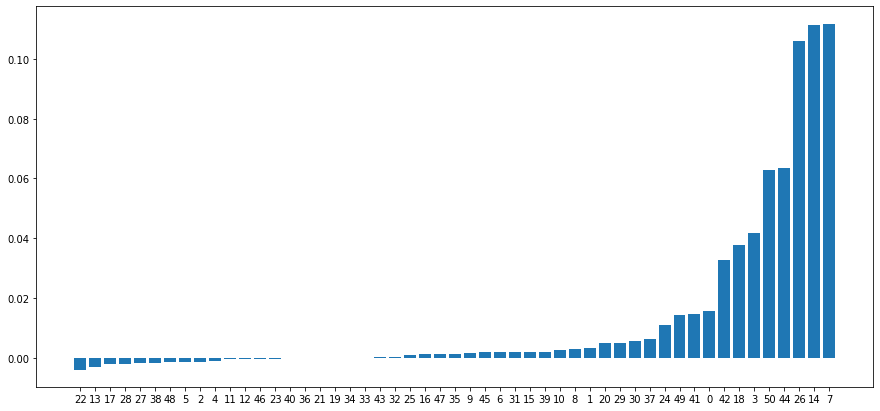


Top 10 features with the most importance are: 
pNR2A_N, APP_N, pPKCG_N, Ubiquitin_N, CaNA_N, pCAMKII_N, DSCR1_N, PSD95_N, DYRK1A_N, pCASP9_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       129
           1       0.94      0.80      0.86       100

    accuracy                           0.89       229
   macro avg       0.90      0.88      0.89       229
weighted avg       0.90      0.89      0.89       229

Balanced Accuracy:  0.881
AUC:  0.881


In [109]:
#SVM (kernels,width and slack penalty)

#Estimator for GridSearchCV 
svc_b= SVC()

#Creating a dictionary of parameters to try in GridSearchCV
params_= { 'C':[0.0001,0.001,0.01,0.1,1],
           'kernel' : ['linear','rbf','sigmoid']}
clf = GridSearchCV(estimator = svc_b,param_grid = params_,scoring='f1',refit=True,cv = 5)
clf.fit(X_train_binary,Y_train_binary)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to our model
svc_b.set_params(**(clf.best_params_))
#print(svc)
svc_b.fit(X_train_binary,Y_train_binary)
Y_predicted = svc_b.predict(X_valid_binary)

print("Metrics for validation set")
print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

#Feature Importance 
per_imp = permutation_importance(svc_b, X_train_binary, Y_train_binary, n_repeats=10,
                                random_state=0)

#Obtaining the mean importance over n repeats and then sorting them
sorted = per_imp.importances_mean.argsort()

#Finding the top 10 important features for this model
top_10_svc = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10_svc = top_10_svc[::-1]
s_s =sorted.astype(str)

#Plotting the feature importance
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10_svc,sep=', ')

print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_svc_b= RFECV(svc_b,min_features_to_select = 30,cv=5)
ref_svc_b.fit(X_train_binary,Y_train_binary)
Y_predicted = ref_svc_b.predict(X_valid_binary)

print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

Best Parameters:  {'max_depth': 4, 'n_estimators': 100}
Grid Search best score:  0.889
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       129
           1       0.96      0.85      0.90       100

    accuracy                           0.92       229
   macro avg       0.92      0.91      0.91       229
weighted avg       0.92      0.92      0.92       229

Balanced Accuracy:  0.909
AUC:  0.909


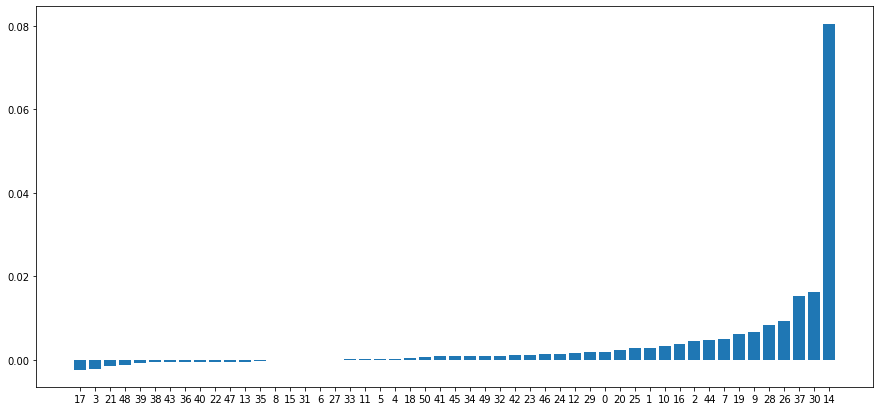


Top 10 features with the most importance are: 
APP_N, AcetylH3K9_N, GluR3_N, pPKCG_N, S6_N, AKT_N, AMPKA_N, pNR2A_N, Ubiquitin_N, pAKT_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       129
           1       0.95      0.86      0.90       100

    accuracy                           0.92       229
   macro avg       0.92      0.91      0.91       229
weighted avg       0.92      0.92      0.92       229

Balanced Accuracy:  0.911
AUC:  0.911


In [110]:
#Random forest (number of trees,max tree depth,max number of variables per node)

#Estimator for GridSearchCV
rf_b = RandomForestClassifier()

#Creating a dictionary of parameters to try in GridSearchCV
params_={
    "n_estimators" : [100,110,120],
    "max_depth" : [1,2,3,4]
}

#Using GridSearch cv for parameter tuning
clf = GridSearchCV(estimator = rf_b,param_grid = params_,scoring='f1',refit=True,cv = 5)
Y_train_binary.to_numpy().reshape(len(Y_train_binary.to_numpy()),)
clf.fit(X_train_binary,Y_train_binary)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Fitting the best parameters to out model
rf_b.set_params(**(clf.best_params_))
rf_b.fit(X_train_binary,Y_train_binary)
#print(rf_b)
Y_predicted = rf_b.predict(X_valid_binary)

print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

per_imp = permutation_importance(rf_b, X_train_binary, Y_train_binary, n_repeats=10,
                                random_state=0)

#Finding the mean importance of the feature and sorting them 
sorted= per_imp.importances_mean.argsort()

#Estimating the top 10 features 
top_10_rf = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10_rf = top_10_rf[::-1]
s_s =sorted.astype(str)

#plotting the feature importance 
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10_rf,sep=', ')

print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_rf_b = RFECV(rf_b,min_features_to_select = 30,cv=5)
ref_rf_b.fit(X_train_binary,Y_train_binary)
Y_predicted = ref_rf_b.predict(X_valid_binary)

print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))


Best Parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'adam'}
Grid Search best score:  0.916
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       129
           1       0.96      0.92      0.94       100

    accuracy                           0.95       229
   macro avg       0.95      0.94      0.95       229
weighted avg       0.95      0.95      0.95       229

Balanced Accuracy:  0.944
AUC:  0.944


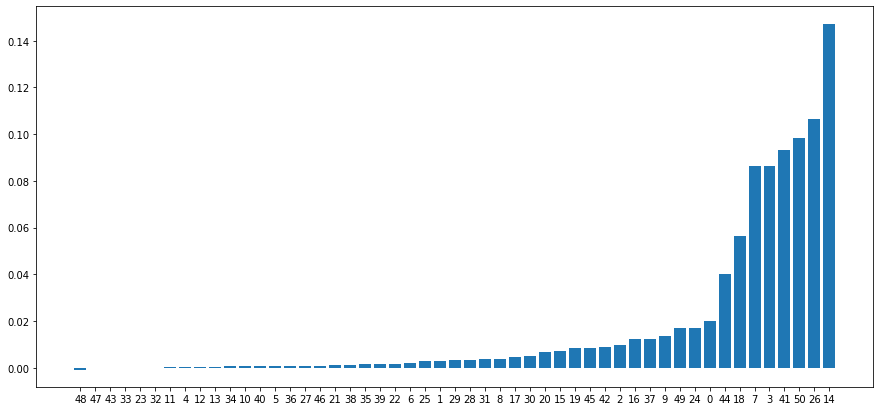


Top 10 features with the most importance are: 
APP_N, pPKCG_N, CaNA_N, pCASP9_N, pCAMKII_N, pNR2A_N, DSCR1_N, Ubiquitin_N, DYRK1A_N, P70S6_N


In [111]:
#Neural Network with ReLu hidden layer and softmax output(Number of neurons,weight decay)

#Estimator for GridSearchCV
MLP_b = MLPClassifier()

#Setting the output activation to be softmax
MLP_b.out_activation = 'softmax'

#Creating a dictionary of parameters to try in GridSearchCV
params_={'activation':['relu'],'max_iter':[10000],'solver':['adam'],
    'hidden_layer_sizes': [(5),(6),(7),(8)],
    'alpha': [0.01,0.1]}
clf = GridSearchCV(estimator=MLP_b,param_grid=params_,scoring='f1',refit=True,cv=5)
clf.fit(X_train_binary,Y_train_binary)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to MLP model
MLP_b.set_params(**(clf.best_params_))
MLP_b.fit(X_train_binary,Y_train_binary)
Y_predicted=MLP_b.predict(X_valid_binary)

print(classification_report(Y_valid_binary,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_binary,Y_predicted),3))
print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

per_imp = permutation_importance(MLP_b, X_train_binary, Y_train_binary, n_repeats=10,
                                random_state=0)
#print('Permutation importance scores', result.importances)
sorted= per_imp.importances_mean.argsort()

#Estimating the importance features 
top_10_nn = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10_nn = top_10_nn[::-1]
s_s =sorted.astype(str)
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10_nn,sep=', ')

##Multi-class classification

Best Parameters:  {'alpha': 0.001, 'l1_ratio': 0.5}
Grid Search best score:  0.844
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        75
           1       1.00      0.86      0.93        58
           2       0.77      0.54      0.63        56
           3       0.83      0.88      0.85        40

    accuracy                           0.79       229
   macro avg       0.82      0.79      0.79       229
weighted avg       0.81      0.79      0.79       229

Balanced Accuracy:  0.788


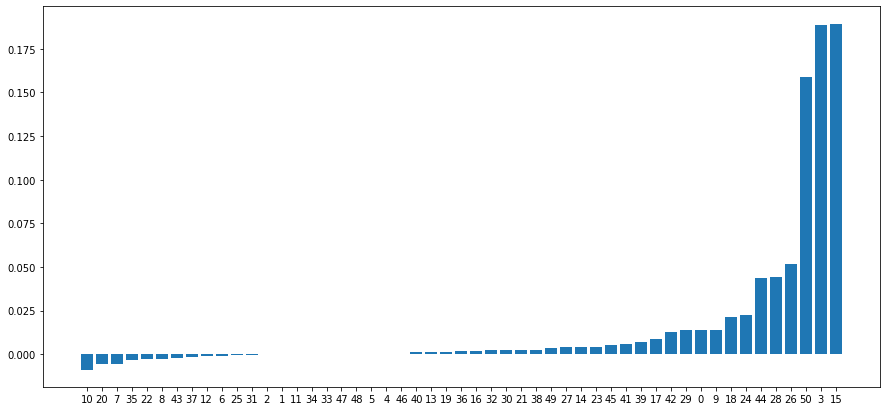


Top 10 features with the most importance are: 
SOD1_N, pCAMKII_N, CaNA_N, pPKCG_N, S6_N, Ubiquitin_N, P70S6_N, DSCR1_N, AKT_N, DYRK1A_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        75
           1       0.95      0.95      0.95        58
           2       0.76      0.70      0.73        56
           3       0.92      0.85      0.88        40

    accuracy                           0.83       229
   macro avg       0.85      0.83      0.84       229
weighted avg       0.84      0.83      0.83       229

Balanced Accuracy:  0.834


In [112]:
from sklearn.metrics import classification_report

#Estimator for gridsearch
SG_m = SGDClassifier(penalty = 'elasticnet')

#creating a dictionary of different values for parameters 
params_={
        'alpha' : [1e-3,1e-2,1e-1,1],
        'l1_ratio' : [0.1,0.25,0.5,0.75]
}
clf = GridSearchCV(estimator = SG_m, param_grid = params_,refit=True,cv=5)
clf.fit(X_train_multi,Y_train_multi)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to the model
SG_m.set_params(**(clf.best_params_))
SG_m.fit(X_train_multi,Y_train_multi)
Y_predicted = SG_m.predict(X_valid_multi)

print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))
#print("AUC: ",round(roc_auc_score(Y_valid_multi,Y_predicted),3))

per_imp = permutation_importance(SG_m, X_train_multi, Y_train_multi, n_repeats=10,
                                random_state=0)

#Finding the mean of feature importance over n repeats
sorted = per_imp.importances_mean.argsort()

#Finding the top 10 important features
top_10 = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10 = top_10[::-1]
s_s =sorted.astype(str)

#Plotting the feature importance
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10,sep=', ')


print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_SG_m = RFECV(SG_m,min_features_to_select = 30,cv=5)
ref_SG_m.fit(X_train_multi,Y_train_multi)
Y_predicted = ref_SG_m.predict(X_valid_multi)

print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))
#print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))


Best Parameters:  {'C': 1, 'kernel': 'linear'}
Grid Search best score:  0.87
Metrics for validation set
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        75
           1       0.94      1.00      0.97        58
           2       0.80      0.84      0.82        56
           3       1.00      0.90      0.95        40

    accuracy                           0.89       229
   macro avg       0.90      0.89      0.90       229
weighted avg       0.89      0.89      0.89       229

Balanced Accuracy:  0.895


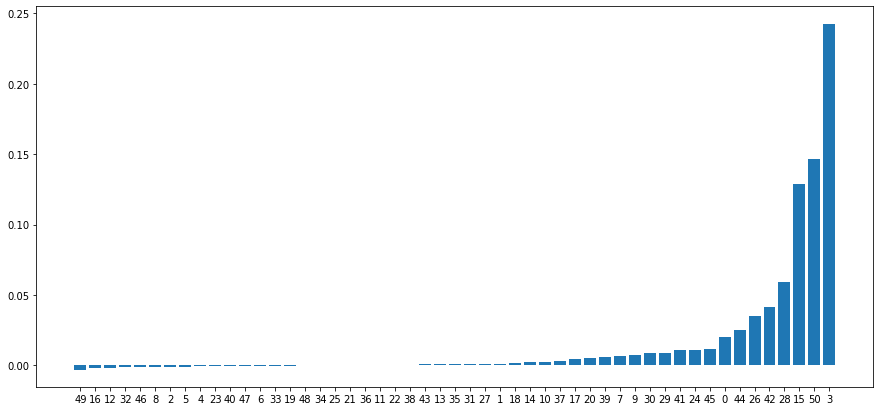


Top 10 features with the most importance are: 
pCAMKII_N, CaNA_N, SOD1_N, S6_N, PSD95_N, pPKCG_N, Ubiquitin_N, DYRK1A_N, pGSK3B_Tyr216_N, P70S6_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        75
           1       0.91      1.00      0.95        58
           2       0.69      0.88      0.77        56
           3       1.00      0.85      0.92        40

    accuracy                           0.85       229
   macro avg       0.87      0.86      0.86       229
weighted avg       0.86      0.85      0.85       229

Balanced Accuracy:  0.858


In [113]:
#Estimator for GridSearchCV 
svc_m = SVC()

#Creating a dictionary of parameters to try in GridSearchCV
params_= { 'C':[0.0001,0.001,0.01,0.1,1],
           'kernel' : ['linear','rbf','sigmoid']}
clf = GridSearchCV(estimator = svc_m,param_grid = params_,refit=True,cv = 5)
clf.fit(X_train_multi,Y_train_multi)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to our model
svc_m.set_params(**(clf.best_params_))
#print(svc)
svc_m.fit(X_train_multi,Y_train_multi)
Y_predicted = svc_m.predict(X_valid_multi)

print("Metrics for validation set")
print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))

per_imp = permutation_importance(svc_m, X_train_multi, Y_train_multi, n_repeats=10,
                                random_state=0)

#estimating the mean of feature importance
sorted = per_imp.importances_mean.argsort()

#finding the top 10 important features
top_10 = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10 = top_10[::-1]
s_s =sorted.astype(str)

#Plotting the feature importance
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10,sep=', ')

print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_svc_m = RFECV(svc_m,min_features_to_select = 30,cv=5)
ref_svc_m.fit(X_train_multi,Y_train_multi)
Y_predicted = ref_svc_m.predict(X_valid_multi)

print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))
#print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

Best Parameters:  {'max_depth': 4, 'n_estimators': 120}
Grid Search best score:  0.919
Metrics for validation set
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        75
           1       0.94      1.00      0.97        58
           2       0.80      0.84      0.82        56
           3       1.00      0.90      0.95        40

    accuracy                           0.89       229
   macro avg       0.90      0.89      0.90       229
weighted avg       0.89      0.89      0.89       229

Balanced Accuracy:  0.895


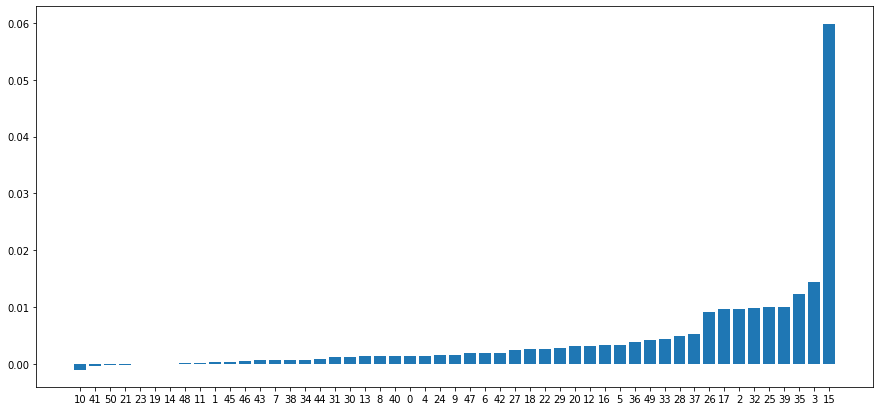


Top 10 features with the most importance are: 
SOD1_N, pCAMKII_N, nNOS_N, IL1B_N, pGSK3B_N, BAX_N, pAKT_N, P38_N, pPKCG_N, GluR3_N

***********AFTER ELIMINATION*****************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        75
           1       0.87      1.00      0.93        58
           2       0.90      0.82      0.86        56
           3       1.00      0.78      0.87        40

    accuracy                           0.90       229
   macro avg       0.91      0.88      0.89       229
weighted avg       0.90      0.90      0.89       229

Balanced Accuracy:  0.882


In [114]:
#Random forest (number of trees,max tree depth,max number of variables per node)

#Estimator for GridSearch
rf_m = RandomForestClassifier()

#creating a dictionary of parameters to be tuned with range of values
params_={
    "n_estimators" : [100,110,120],
    "max_depth" : [1,2,3,4]
}
clf = GridSearchCV(estimator = rf_m,param_grid = params_,refit=True,cv = 5)
Y_train_multi.to_numpy().reshape(len(Y_train_multi.to_numpy()),)
clf.fit(X_train_multi,Y_train_multi)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to our model
rf_m.set_params(**(clf.best_params_))
#print(svc)
rf_m.fit(X_train_multi,Y_train_multi)
Y_predicted = svc_m.predict(X_valid_multi)

print("Metrics for validation set")
print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))

per_imp = permutation_importance(rf_m, X_train_multi, Y_train_multi, n_repeats=10,
                                random_state=0)

#Estimating the mean of feature importance 
sorted = per_imp.importances_mean.argsort()

#Estimating top 10 important features
top_10 = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10 = top_10[::-1]
s_s =sorted.astype(str)

#Plotting the feature importance
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10,sep=', ')

print()
print("***********AFTER ELIMINATION*****************")

#Recursive Feature Elimination
#We are eliminating 21 features and seeing if that would effect the performance of the model
ref_rf_m = RFECV(rf_m,min_features_to_select = 30,cv=5)
ref_rf_m.fit(X_train_multi,Y_train_multi)
Y_predicted = ref_rf_m.predict(X_valid_multi)

print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'adam'}
Grid Search best score:  0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       1.00      1.00      1.00        58
           2       0.98      0.96      0.97        56
           3       1.00      1.00      1.00        40

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229

Balanced Accuracy:  0.988


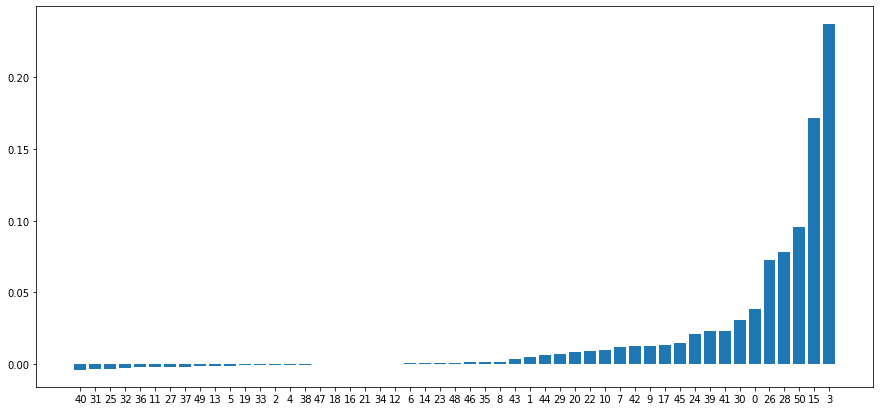


Top 10 features with the most importance are: 
pCAMKII_N, SOD1_N, CaNA_N, S6_N, pPKCG_N, DYRK1A_N, AcetylH3K9_N, pCASP9_N, IL1B_N, P70S6_N


In [115]:
#Neural Network with ReLu hidden layer and softmax output(Number of neurons,weight decay)
#Estimator for GridSearchCV
MLP_m = MLPClassifier()

#Setting the output activation to be softmax
MLP_m.out_activation = 'softmax'

#Creating a dictionary of parameters to try in GridSearchCV
params_={'activation':['relu'],'max_iter':[10000],'solver':['adam'],
    'hidden_layer_sizes': [(5),(6),(7),(8)],
    'alpha': [0.01,0.1]}
clf = GridSearchCV(estimator=MLP_m,param_grid=params_,refit=True,cv=5)
clf.fit(X_train_multi,Y_train_multi)
print("Best Parameters: ",clf.best_params_)
print("Grid Search best score: ",round(clf.best_score_,3))

#Setting best parameters to MLP model
MLP_m.set_params(**(clf.best_params_))
MLP_m.fit(X_train_multi,Y_train_multi)
Y_predicted=MLP_m.predict(X_valid_multi)

print(classification_report(Y_valid_multi,Y_predicted))
print("Balanced Accuracy: ",round(balanced_accuracy_score(Y_valid_multi,Y_predicted),3))
#print("AUC: ",round(roc_auc_score(Y_valid_binary,Y_predicted),3))

per_imp = permutation_importance(MLP_m, X_train_multi, Y_train_multi, n_repeats=10,
                                random_state=0)

#Estimating the mean of feature importance
sorted= per_imp.importances_mean.argsort()

#Estimating top 10 important features
top_10 = X_train_binary.columns[sorted[(len(sorted)-10):]]
top_10 = top_10[::-1]
s_s =sorted.astype(str)
plt.figure(figsize=(15,7))
plt.bar(s_s, per_imp.importances[sorted].mean(axis=1).T)
plt.show()

print()
print("Top 10 features with the most importance are: ")
print(*top_10,sep=', ')

#Test Data

In [116]:
#Importing the test data 
df_test = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
df_test

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [117]:
#Checking if there are any null values
print("Number of Null/Nan values in the given dataset => ",df_test.isnull().sum().sum())

Number of Null/Nan values in the given dataset =>  213


In [118]:
#Removing the Null/Nan vlaues using Iterative Imputer
imp_dataset_test = df_test.drop(columns = ['Genotype','Treatment_Behavior'],axis = 1)

imp_test = IterativeImputer(max_iter = 10, tol = 1e-3)

#Following we fit the imputer on the dataset (i.e imp_dataset) and it returns self
imp_test.fit(imp_dataset_test)

#Using the fit_transform we fit the imputer on the dataset (i.e imp_dataset) and it returns the transformed dataset
#The dataset is then converted into a dataframe
df_test_imputed = pd.DataFrame(imp.fit_transform(imp_dataset_test),columns = imp_dataset_test.columns)

X_test = df_test_imputed

print(X_test.shape)
# df_imputed['Genotype'] = df['Genotype']  
# df_imputed['Treatment_Behavior'] = df['Treatment_Behavior'] 

#df_imputed.head()
print(X_test.isnull().sum().sum())

(225, 77)
0


In [119]:
#Removing highly correlated features we will remove the same columns estimated earlier
X_test = X_test.drop(cols,axis=1)

##Binary Classification


In [120]:
#For Binary classification we will use the Random forest and MLP (Neural Network) 
Y_predicted_test_rf = ref_rf_b.predict(X_test)
Y_predicted_test_mlp = MLP_b.predict(X_test)
Y_true = df_test['Genotype']

#Obtaining labels from encoding 
Y_predicted_test_rf = le1.inverse_transform(Y_predicted_test_rf)
Y_predicted_test_mlp = le1.inverse_transform(Y_predicted_test_mlp)
print("Random Forest")
print(classification_report(Y_true,Y_predicted_test_rf))
print()
print("MLP (Neural Network)")
print(classification_report(Y_true,Y_predicted_test_mlp))

Random Forest
              precision    recall  f1-score   support

     Control       0.74      0.84      0.79       135
      Ts65Dn       0.70      0.54      0.61        90

    accuracy                           0.72       225
   macro avg       0.72      0.69      0.70       225
weighted avg       0.72      0.72      0.72       225


MLP (Neural Network)
              precision    recall  f1-score   support

     Control       0.96      0.79      0.87       135
      Ts65Dn       0.75      0.96      0.84        90

    accuracy                           0.86       225
   macro avg       0.86      0.87      0.86       225
weighted avg       0.88      0.86      0.86       225



## Multi-class classification

In [121]:
#For Multiclass classification we will use the Random forest and MLP (Neural Network) 
Y_predicted_test_rf = rf_m.predict(X_test)
Y_predicted_test_mlp = MLP_m.predict(X_test)
Y_true = df_test['Treatment_Behavior']

#Obtaining labels from encoding 
Y_predicted_test_rf = le2.inverse_transform(Y_predicted_test_rf)
Y_predicted_test_mlp = le2.inverse_transform(Y_predicted_test_mlp)
print("Random Forest")
print(classification_report(Y_true,Y_predicted_test_rf))
print()
print("MLP (Neural Network)")
print(classification_report(Y_true,Y_predicted_test_mlp))

Random Forest
               precision    recall  f1-score   support

Memantine_C/S       0.68      0.95      0.79        60
Memantine_S/C       0.74      0.75      0.74        60
   Saline_C/S       0.92      0.55      0.69        60
   Saline_S/C       0.66      0.64      0.65        45

     accuracy                           0.73       225
    macro avg       0.75      0.72      0.72       225
 weighted avg       0.75      0.73      0.72       225


MLP (Neural Network)
               precision    recall  f1-score   support

Memantine_C/S       0.66      0.72      0.69        60
Memantine_S/C       0.73      0.75      0.74        60
   Saline_C/S       0.66      0.55      0.60        60
   Saline_S/C       0.69      0.73      0.71        45

     accuracy                           0.68       225
    macro avg       0.68      0.69      0.68       225
 weighted avg       0.68      0.68      0.68       225



##Disscussion and Observations

1) Null values in both test and train dataset was observed hence Iterative imputation method was employed to get handle the missing datas

2) The classes do not seem to be unbalanced. In Binary classification there are $435$ control and $327$ Ts65Dn. In Multiclass classification there are $225$ Memantine_C/S, $225$ Memantine_S/C, $180$ Saline_C/S and $132$ Saline_S/C

3) A test train split is used as the models are performance on the validation dataset obtained from test_train_split and then we decided to choose the best models of the given four models and use it on test csv that was provided 

4) From the HeatMap it can be observed that there exists highly correlated features (not the diagonal). We have taken a threshold of $0.8$ and we get 26 highly correlated features, which are later removed. A threshold of $0.8$ was chosen has we could not find any hard and fast rule on what the threshold should be

5)Instead of using Elastic Net from linear model we are using SGDClassifier has it implements logistic regression with elastic penalty where as elastic net is for linear regression

6) When the number of neurons in Neural Network was high then its accuracy and f1 score on the validation was very high close to $1$ and when that model was tested on the test set then it gave very poor accuracy and f1 score. So we reduced the number of neurons in the Neural Network

7) Permutation feature importance is used to estimate the importance of each feature. Some of the features are removed and then we see if there was some improvement in the model. 

8)We display the top 10 features that have impact on the model. It can be seen that some feature do repeat in the top 10 features associated with other models

9) Using the Recursive Feature elimination some of the features where removed. Upon removing the features the metric seems to be near to values/metrics prior to feature elimination or there is little improvement. No drastic improvement was seen

10) Its to be noted that Recursive Feature elimination only works with a linear Kernel and does not work with MLP

11) Random Forest and Neural Network tend to perform slightly better than the other models hence they were used on the test dataset and we can see the results are decent from the metrics and not so high

##References


[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

[3] https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

[4] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[5] https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[7] https://towardsdatascience.com/a-better-way-to-handle-missing-values-in-your-dataset-using-iterativeimputer-9e6e84857d98

[8] https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

[9] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[10] https://scikit-learn.org/stable/modules/permutation_importance.html